## Time Series Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas.tools.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_stocks.csv')

In [3]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.shape

(41266, 502)

In [7]:
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

### Problem Statement: Pick up the following stocks and generate forecasts accordingly stocks:
1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [8]:
df_sel = df[['DATE','NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']]

In [9]:
df.head(2)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.33,143.68,129.63,82.04,102.23,85.22,59.76,121.52,...,84.37,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.35
1,1491226260,2364.1001,42.36,143.70,130.32,82.08,102.14,85.65,59.84,121.48,...,84.37,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.35


In [10]:
import datetime as dt
df['Date']=df.iloc[:,0].apply(lambda x:  dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [11]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,Date
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03


In [12]:
df.drop('DATE', axis=1, inplace=True)

In [13]:
df.shape

(41266, 502)

In [14]:
df.set_index('Date',inplace=True)

## Visualize the Data

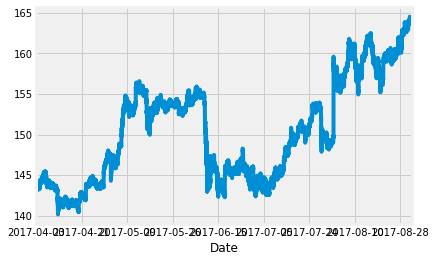

In [15]:
df['NASDAQ.AAPL'].plot()

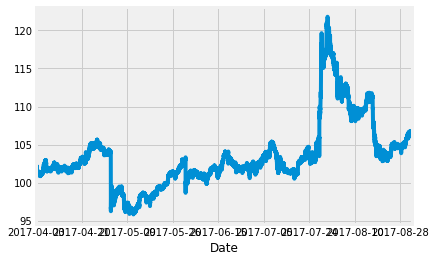

In [16]:
df['NASDAQ.ADP'].plot()

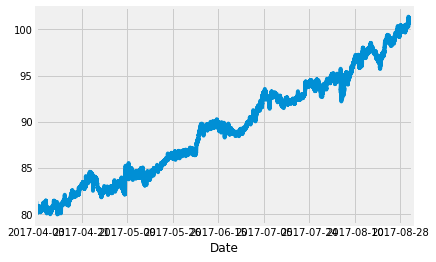

In [17]:
df['NASDAQ.CBOE'].plot()

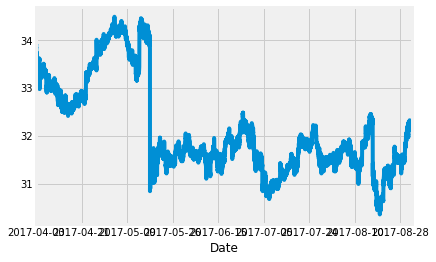

In [18]:
df['NASDAQ.CSCO'].plot()

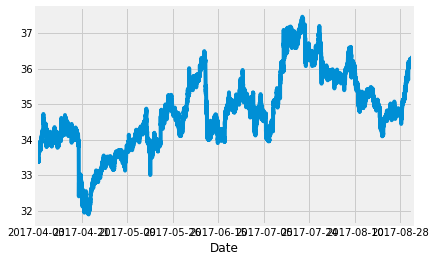

In [19]:
df['NASDAQ.EBAY'].plot()

### Decomposition

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

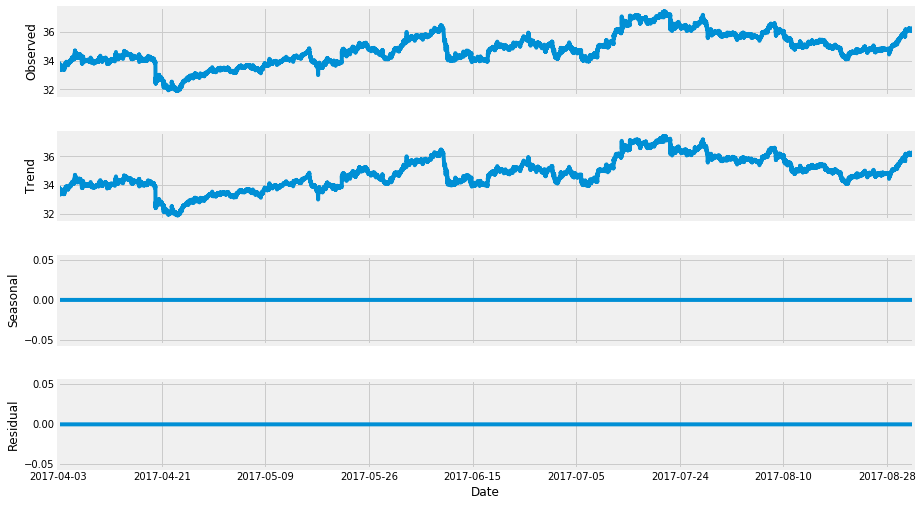

In [21]:
decomposition = seasonal_decompose(df['NASDAQ.EBAY'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

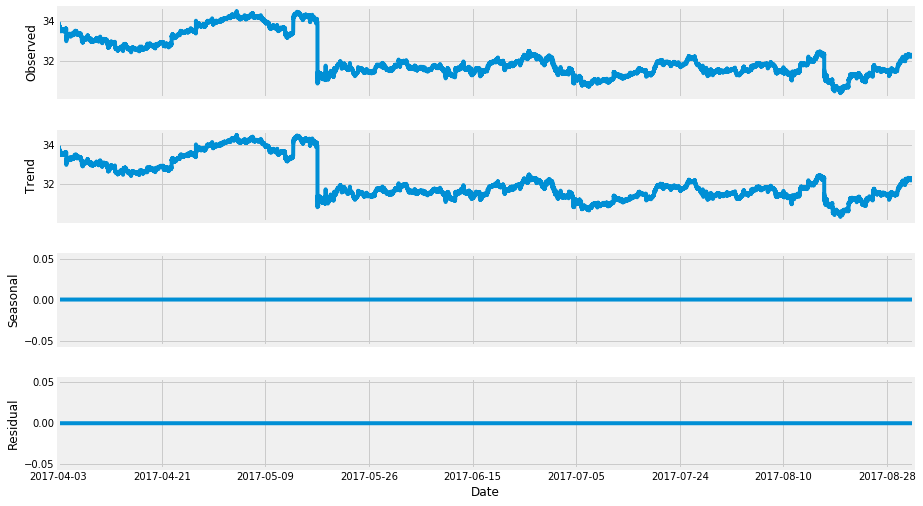

In [22]:
decomposition = seasonal_decompose(df['NASDAQ.CSCO'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

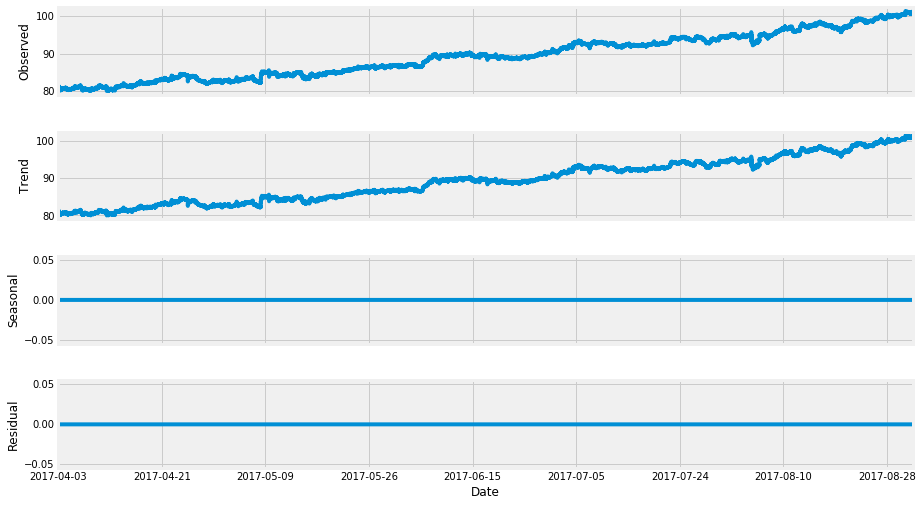

In [23]:
decomposition = seasonal_decompose(df['NASDAQ.CBOE'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

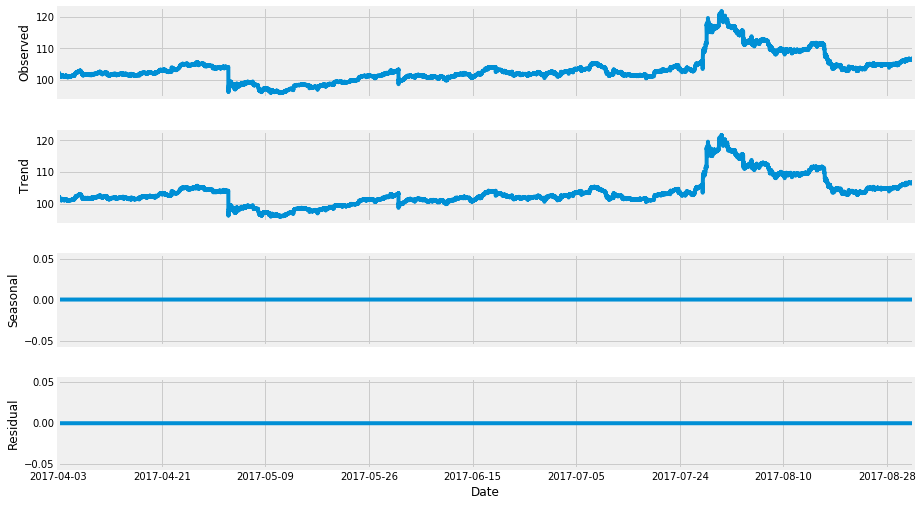

In [24]:
decomposition = seasonal_decompose(df['NASDAQ.ADP'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

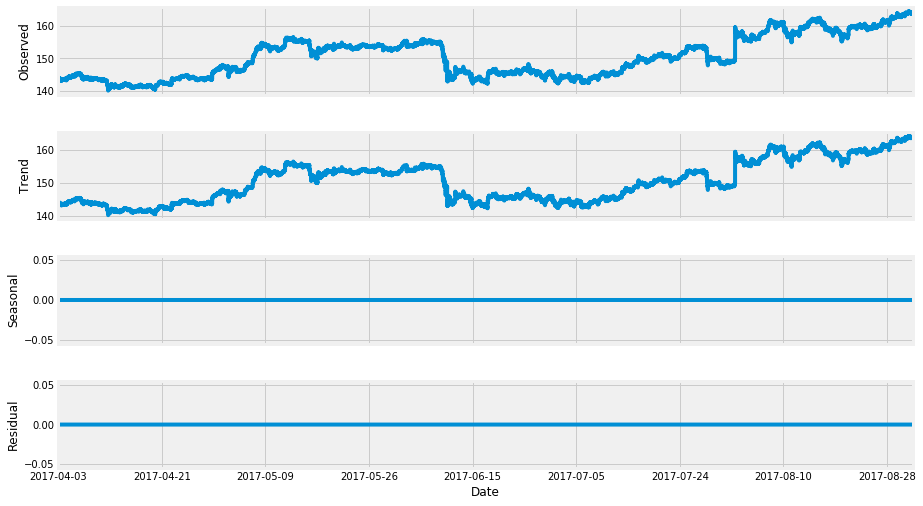

In [25]:
decomposition = seasonal_decompose(df['NASDAQ.AAPL'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

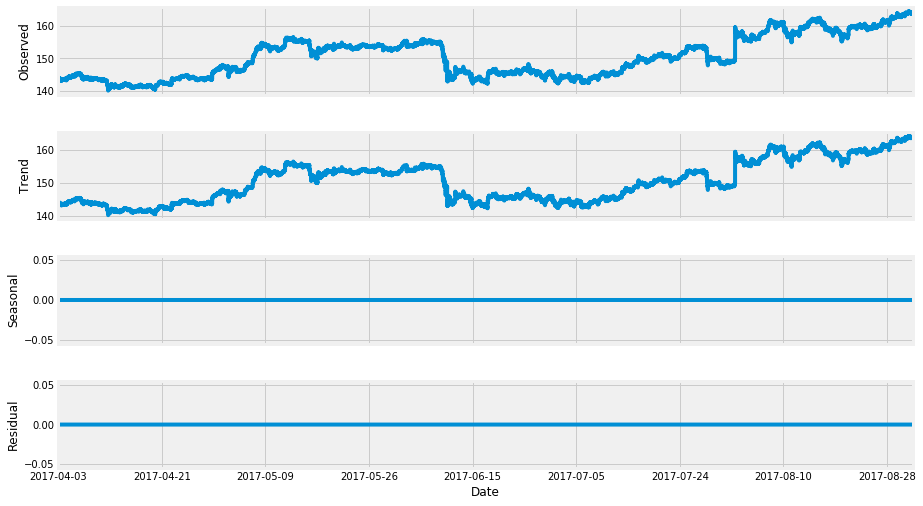

In [26]:
decomposition = seasonal_decompose(df['NASDAQ.AAPL'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

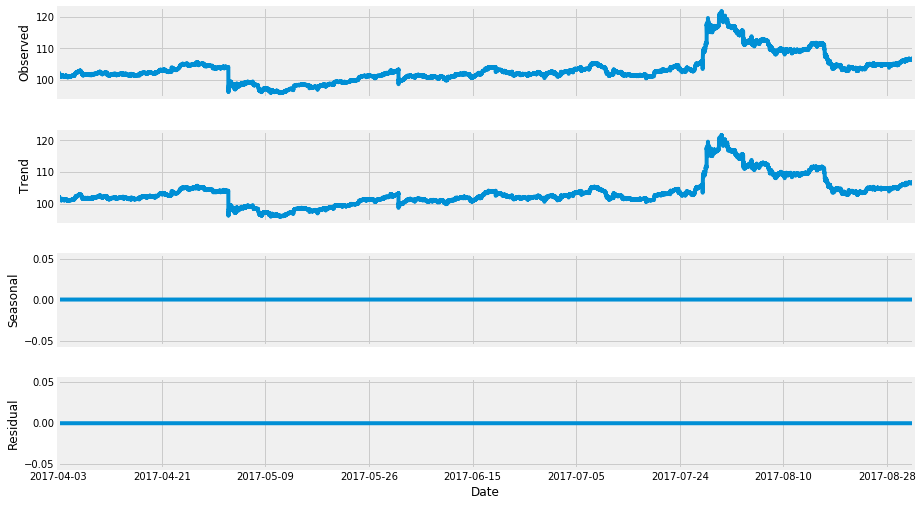

In [27]:
decomposition = seasonal_decompose(df['NASDAQ.ADP'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

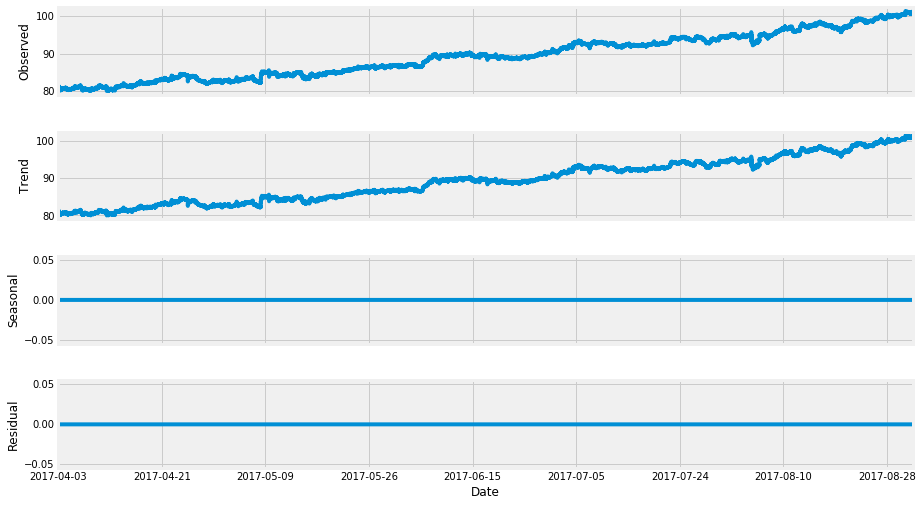

In [28]:
decomposition = seasonal_decompose(df['NASDAQ.CBOE'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

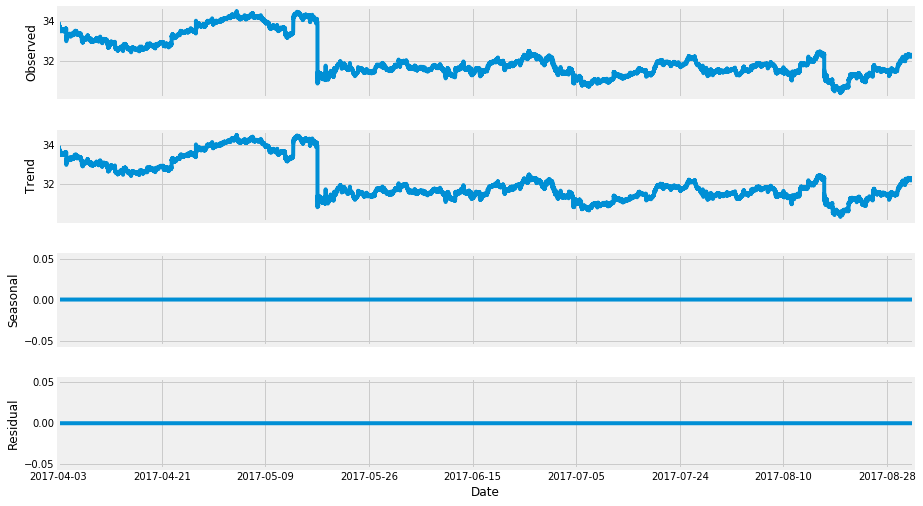

In [29]:
decomposition = seasonal_decompose(df['NASDAQ.CSCO'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

<Figure size 432x288 with 0 Axes>

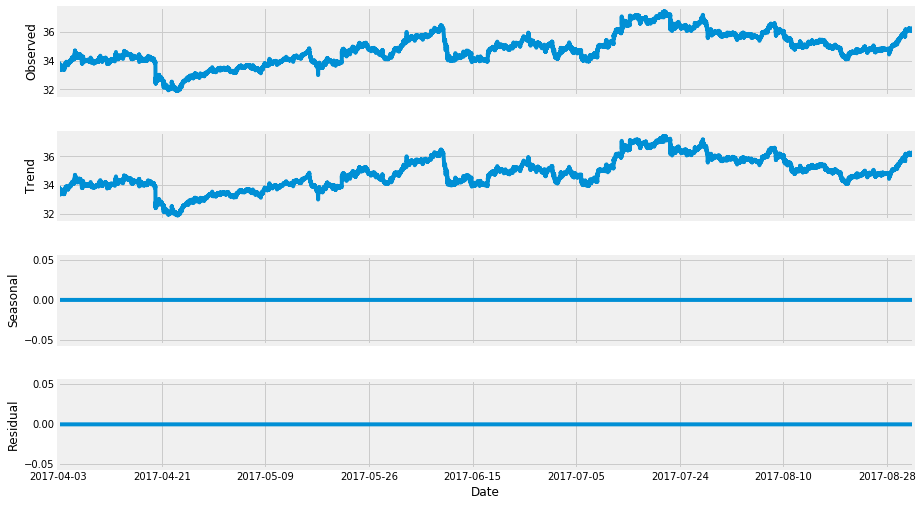

In [30]:
decomposition = seasonal_decompose(df['NASDAQ.EBAY'],freq=1)
fig = plt.figure()
fig=decomposition.plot()
fig.set_size_inches(15,8)

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf_check(time_series):
    """
    Pass in a time series, return ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p Value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels): 
        print(label+' : '+ str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary')
    else:
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [33]:
adf_check(df['NASDAQ.AAPL'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926726
p Value : 0.7837101772613848
#Lags Used : 31
Number of Observations Used : 41234
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [34]:
adf_check(df['NASDAQ.ADP'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251574583
p Value : 0.4289634442066952
#Lags Used : 39
Number of Observations Used : 41226
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [35]:
adf_check(df['NASDAQ.CBOE'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.16633930282615209
p Value : 0.9703092030510077
#Lags Used : 27
Number of Observations Used : 41238
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [36]:
adf_check(df['NASDAQ.CSCO'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.395554610889459
p Value : 0.14299501995164532
#Lags Used : 47
Number of Observations Used : 41218
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [37]:
adf_check(df['NASDAQ.EBAY'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.875761635941474
p Value : 0.3435480878024473
#Lags Used : 47
Number of Observations Used : 41218
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### Making Series Stationary

In [38]:
## First Diffrence
df['Apple First Diffrence'] = df['NASDAQ.AAPL'] - df['NASDAQ.AAPL'].shift(1)

In [39]:
df['Apple First Diffrence'].head()

Date
2017-04-03       NaN
2017-04-03    0.0200
2017-04-03   -0.0099
2017-04-03   -0.0501
2017-04-03    0.0200
Name: Apple First Diffrence, dtype: float64

In [40]:
adf_check(df['Apple First Diffrence'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.737741483401045
p Value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary


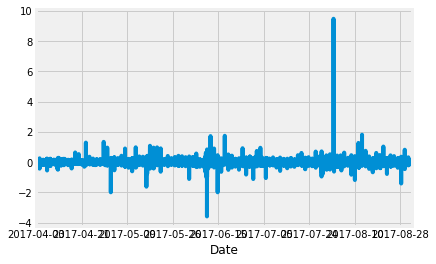

In [41]:
df['Apple First Diffrence'].plot()

Augmented Dickey-Fuller Test:
ADF Test Statistic : -31.05566224463222
p Value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary


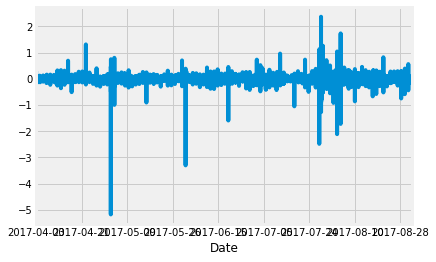

In [42]:
## First Diffrence
df['Apple First Diffrence'] = df['NASDAQ.ADP'] - df['NASDAQ.ADP'].shift(1)
adf_check(df['Apple First Diffrence'].dropna())
df['Apple First Diffrence'].plot()

Augmented Dickey-Fuller Test:
ADF Test Statistic : -41.6420936454314
p Value : 0.0
#Lags Used : 26
Number of Observations Used : 41238
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary


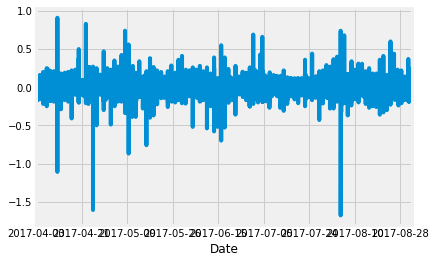

In [43]:
## First Diffrence
df['Apple First Diffrence'] = df['NASDAQ.CBOE'] - df['NASDAQ.CBOE'].shift(1)
adf_check(df['Apple First Diffrence'].dropna())
df['Apple First Diffrence'].plot()

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.35668253256679
p Value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary


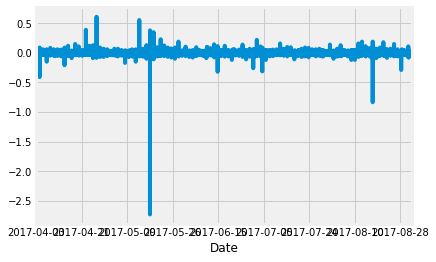

In [44]:
## First Diffrence
df['Apple First Diffrence'] = df['NASDAQ.CSCO'] - df['NASDAQ.CSCO'].shift(1)
adf_check(df['Apple First Diffrence'].dropna())
df['Apple First Diffrence'].plot()

Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.679619239193357
p Value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
Strong evidence against null hypothesis, reject the null hypothesis. Data has no unit root and its stationary


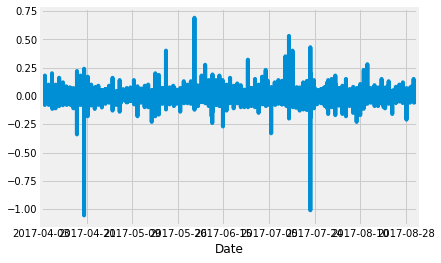

In [45]:
## First Diffrence
df['Apple First Diffrence'] = df['NASDAQ.EBAY'] - df['NASDAQ.EBAY'].shift(1)
adf_check(df['Apple First Diffrence'].dropna())
df['Apple First Diffrence'].plot()

### Apply ARIMA

In [46]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA

In [47]:
# fit model
model_NASDAQ = ARIMA(df['NASDAQ.AAPL'], order=(0,1,1))
model_fit_NASDAQ = model_NASDAQ.fit(disp=0)
print(model_fit_NASDAQ.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.AAPL   No. Observations:                41265
Model:                 ARIMA(0, 1, 1)   Log Likelihood               39219.078
Method:                       css-mle   S.D. of innovations              0.094
Date:                Sun, 28 Jul 2019   AIC                         -78432.156
Time:                        15:44:14   BIC                         -78406.272
Sample:                             1   HQIC                        -78423.975
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      1.080      0.280      -0.000       0.001
ma.L1.D.NASDAQ.AAPL    -0.0105      0.005     -2.104      0.035      -0.020      -0.001
                

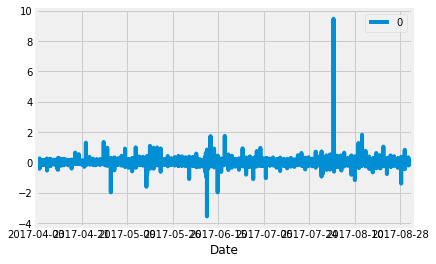

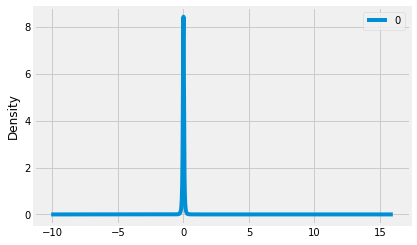

                  0
count  4.126500e+04
mean   1.011178e-08
std    9.354185e-02
min   -3.573540e+00
25%   -3.074657e-02
50%   -2.323653e-04
75%    3.064629e-02
max    9.460579e+00


In [48]:
from pandas import DataFrame
from matplotlib import pyplot
# plot residual errors
residuals = DataFrame(model_fit_NASDAQ.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [49]:
# fit model
model_ADP = ARIMA(df['NASDAQ.ADP'], order=(0,1,1))
model_fit_ADP = model_ADP.fit(disp=0)
print(model_fit_ADP.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.NASDAQ.ADP   No. Observations:                41265
Model:                 ARIMA(0, 1, 1)   Log Likelihood               48773.863
Method:                       css-mle   S.D. of innovations              0.074
Date:                Sun, 28 Jul 2019   AIC                         -97541.725
Time:                        15:44:17   BIC                         -97515.842
Sample:                             1   HQIC                        -97533.545
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0001      0.000      0.265      0.791      -0.001       0.001
ma.L1.D.NASDAQ.ADP     0.0597      0.005     11.914      0.000       0.050       0.069
                    

In [50]:
# fit model
model_CBOE = ARIMA(df['NASDAQ.CBOE'], order=(0,1,1))
model_fit_CBOE = model_CBOE.fit(disp=0)
print(model_fit_CBOE.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.CBOE   No. Observations:                41265
Model:                 ARIMA(0, 1, 1)   Log Likelihood               68096.815
Method:                       css-mle   S.D. of innovations              0.046
Date:                Sun, 28 Jul 2019   AIC                        -136187.630
Time:                        15:44:18   BIC                        -136161.747
Sample:                             1   HQIC                       -136179.449
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0005      0.000      2.294      0.022       7e-05       0.001
ma.L1.D.NASDAQ.CBOE    -0.0835      0.005    -16.183      0.000      -0.094      -0.073
                

In [51]:
# fit model
model_CSCO= ARIMA(df['NASDAQ.CSCO'], order=(0,1,1))
model_fit_CSCO = model_CSCO.fit(disp=0)
print(model_fit_ADP.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.NASDAQ.ADP   No. Observations:                41265
Model:                 ARIMA(0, 1, 1)   Log Likelihood               48773.863
Method:                       css-mle   S.D. of innovations              0.074
Date:                Sun, 28 Jul 2019   AIC                         -97541.725
Time:                        15:44:19   BIC                         -97515.842
Sample:                             1   HQIC                        -97533.545
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0001      0.000      0.265      0.791      -0.001       0.001
ma.L1.D.NASDAQ.ADP     0.0597      0.005     11.914      0.000       0.050       0.069
                    

In [52]:
# fit model
model_EBAY = ARIMA(df['NASDAQ.EBAY'], order=(0,1,1))
model_fit_EBAY = model_EBAY.fit(disp=0)
print(model_fit_EBAY.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.NASDAQ.EBAY   No. Observations:                41265
Model:                 ARIMA(0, 1, 1)   Log Likelihood               96727.764
Method:                       css-mle   S.D. of innovations              0.023
Date:                Sun, 28 Jul 2019   AIC                        -193449.528
Time:                        15:44:19   BIC                        -193423.645
Sample:                             1   HQIC                       -193441.348
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.621e-05      0.000      0.604      0.546      -0.000       0.000
ma.L1.D.NASDAQ.EBAY    -0.0407      0.005     -8.352      0.000      -0.050      -0.031
                

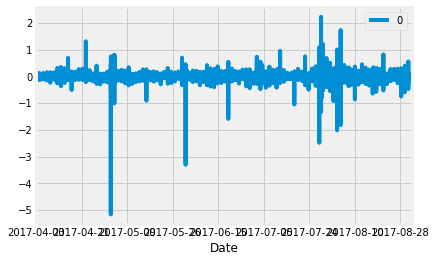

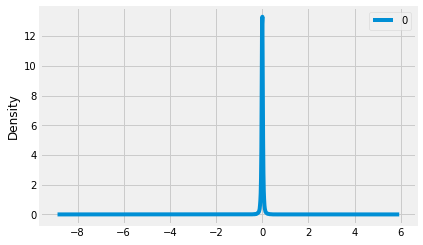

                  0
count  4.126500e+04
mean   1.306839e-07
std    7.420726e-02
min   -5.167073e+00
25%   -1.950721e-02
50%   -4.799313e-05
75%    1.992830e-02
max    2.232012e+00


In [53]:
from pandas import DataFrame
from matplotlib import pyplot
# plot residual errors
residuals_ADP = DataFrame(model_fit_ADP.resid)
residuals_ADP.plot()
pyplot.show()
residuals_ADP.plot(kind='kde')
pyplot.show()
print(residuals_ADP.describe())

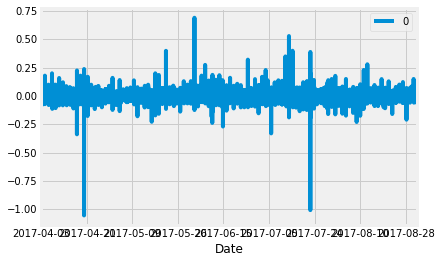

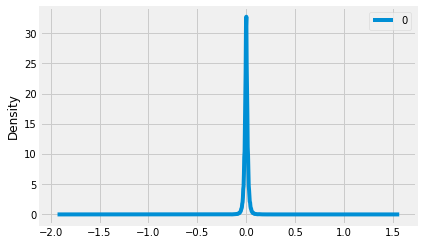

                  0
count  4.126500e+04
mean   2.369086e-09
std    2.321424e-02
min   -1.055982e+00
25%   -9.872638e-03
50%   -6.901836e-05
75%    9.743556e-03
max    6.913321e-01


In [54]:
from pandas import DataFrame
from matplotlib import pyplot
# plot residual errors
residuals_EBAY = DataFrame(model_fit_EBAY.resid)
residuals_EBAY.plot()
pyplot.show()
residuals_EBAY.plot(kind='kde')
pyplot.show()
print(residuals_EBAY.describe())

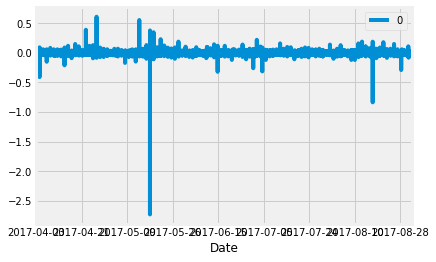

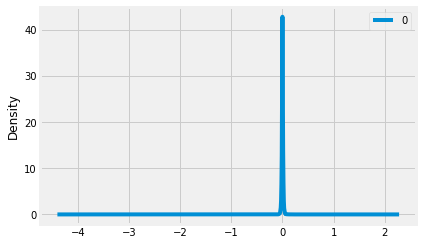

                  0
count  4.126500e+04
mean  -5.132192e-08
std    2.136109e-02
min   -2.729466e+00
25%   -5.297220e-03
50%    3.607087e-05
75%    5.543002e-03
max    6.099548e-01


In [55]:
from pandas import DataFrame
from matplotlib import pyplot
# plot residual errors
residuals_CSCO = DataFrame(model_fit_CSCO.resid)
residuals_CSCO.plot()
pyplot.show()
residuals_CSCO.plot(kind='kde')
pyplot.show()
print(residuals_CSCO.describe())

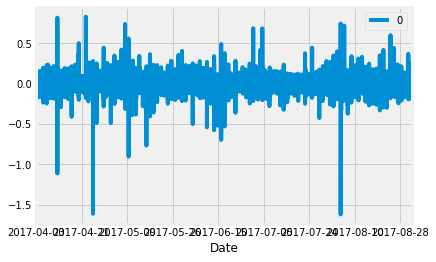

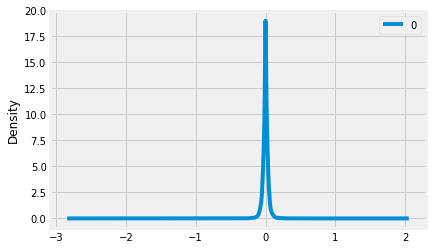

                  0
count  4.126500e+04
mean   3.976128e-07
std    4.646030e-02
min   -1.618312e+00
25%   -1.794796e-02
50%   -3.958280e-04
75%    1.841447e-02
max    8.286361e-01


In [56]:
from pandas import DataFrame
from matplotlib import pyplot
# plot residual errors
residuals_CBOE = DataFrame(model_fit_CBOE.resid)
residuals_CBOE.plot()
pyplot.show()
residuals_CBOE.plot(kind='kde')
pyplot.show()
print(residuals_CBOE.describe())